# What is the relation between the "Brain Weight" and "Head Size" ?
The average adult human brain weighs in at 1.3 to 1.4 kg.

In this topic, we will use Linear Regression technique, to establish the relation between the "Brain Weight" and "Head Size".

At the end we will find accuracy of model using the "RMSE" and "R2 Score"

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
db=pd.read_csv('headbrain.csv')

In [3]:
db.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
db.shape

(237, 4)

In [5]:
db.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

# Exploratory data analysis

In [6]:
db.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


#### check and remove skewness from dataset by using feature transformation

In [7]:
db.skew()

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

In [8]:
db.kurtosis()

Gender                -1.945975
Age Range             -1.995964
Head Size(cm^3)       -0.113456
Brain Weight(grams)    0.204200
dtype: float64

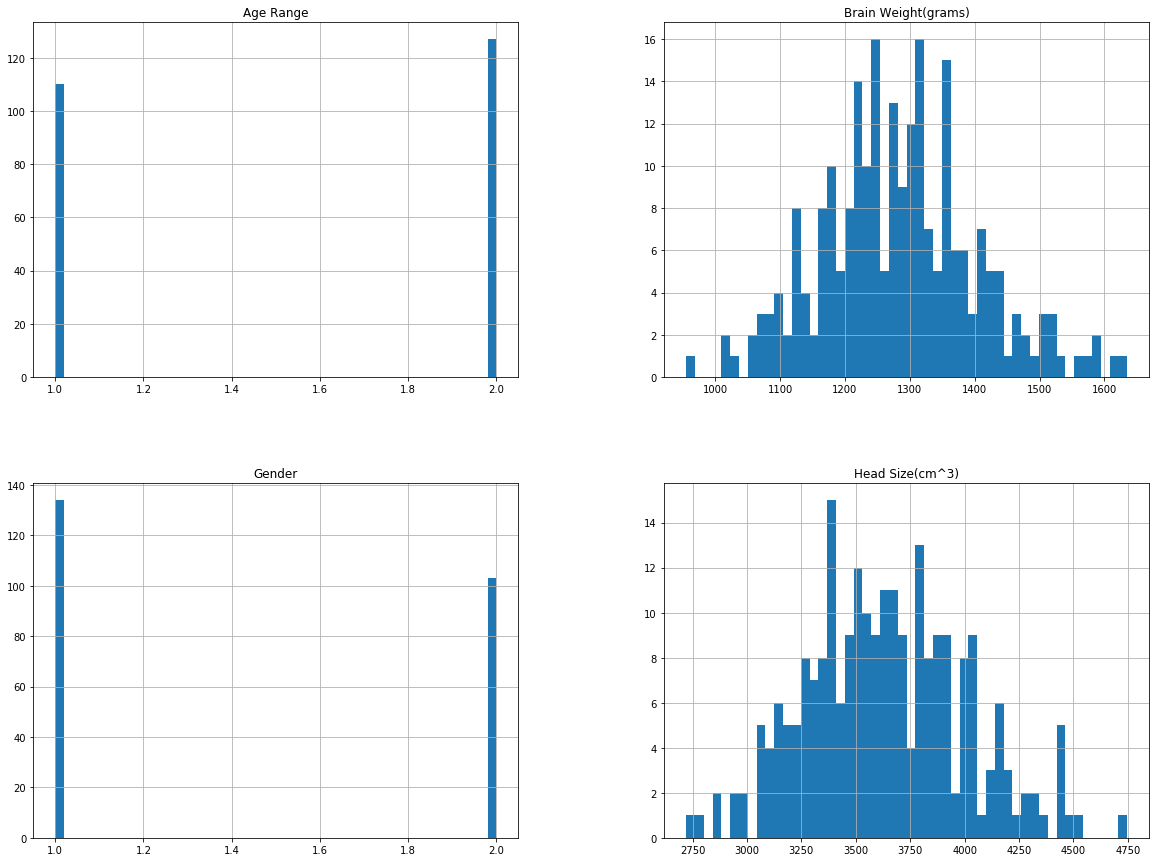

In [10]:
db.dropna().hist(bins=50,figsize=(20,15))
plt.show()

here,we can see that all features of dataset are normally distributed.so,there is no need to use feature transforamtion.

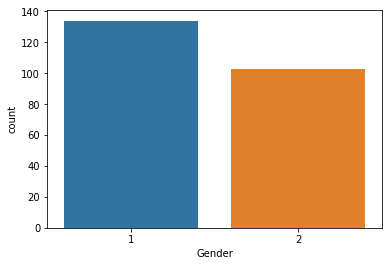

In [11]:
p = sns.countplot(data=db, x = 'Gender')

In [12]:
db.nunique()

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64

### plot a scatter plot for Head Size and Brain Weight

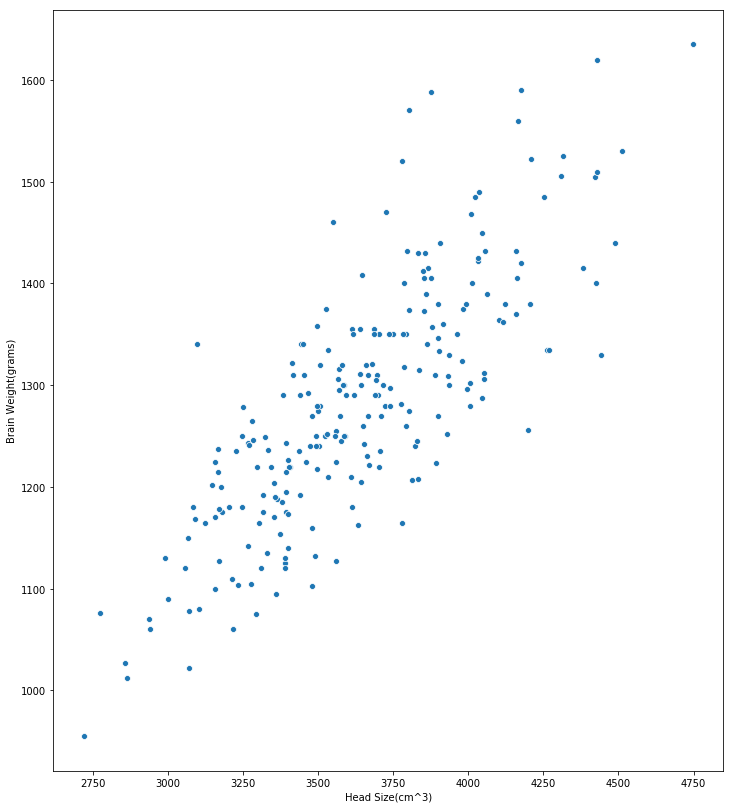

In [12]:
plt.figure(figsize=(12,14))
sns.scatterplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=db)
plt.show()

#### from fir we can see that head size is positive corelated with brain weight.

## Modeling

In [13]:
X=db.drop('Brain Weight(grams)',1)
print(type(X))
Y=db['Brain Weight(grams)']

<class 'pandas.core.frame.DataFrame'>


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state =  40)

#### We can do  using the inbuilt Sklearn Linear Regression model

In [15]:

# X = X.values.reshape(len(X),1)

# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state =  40)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.6490386583825044
